# Recrutamento preditivo

A empresa de tecnologia HighTech busca contratar os melhores profissionais do mercado para fazer parte do time e gerar valor para a empresa. A HighTech vem investindo muito nos últimos anos no uso de ciência de dados no setor do RH para trazer ganhos no processo de seleção e recrutamento. O time de ciência de dados junto com o time de RH vem realizando juntos um projeto de recrutamento preditivo.

O recrutamento preditivo é uma técnica de People Analytics para encontrar os melhores candidatos para contratação da empresa, na prática, o recrutamento preditivo aumenta as chances do recrutador potencializar o processo de seleção. Por meio da coleta e análise de dados, é possível avaliar o perfil e o fit cultural dos profissionais para entender se existe uma boa aderência à vaga. 

**Problema de negócio:**

O objetivo da HighTech é identificar quais são os melhores indicadores para realizar o recrutamento de profissionais. 

**Base de dados**

Este conjunto de dados consiste em algumas características como: percentual de ensino médio e superior e especialização, experiência de trabalho e ofertas salariais para os profissionais colocados.

**Desafio**

Você como cientista de dados do time de dados da HighTech tem o desafio de criar um modelo preditivo de recrutamento para prever como e quais são as melhores variáveis que podem colocar um profissional bem qualificado na HighTech.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
dados_path = './Recrutamento.xlsx'

dados = pd.read_excel(dados_path)

In [74]:
print(dados.shape)
display(dados.head(10))

(215, 15)


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Yes,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Yes,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Yes,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,No,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Yes,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,No,NaN
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,No,NaN
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Yes,252000.0
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Yes,231000.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,No,NaN


Vemos que a variável 'sl_no' trata-se de um código identificador, então já sabemos que não usaremos no dataset final.

In [75]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


Algumas colunas estão indicando "Yes" e "No". São variáveis que podem ser mudadas para valor binário (0 e 1)

In [76]:
print(dados.status.value_counts())
print(dados.workex.value_counts())

Yes    148
No      67
Name: status, dtype: int64
No     141
Yes     74
Name: workex, dtype: int64


# Valores nulos

Além disso, a variável 'salary' também possui valores nulos, candidatos que estão sem emprego (?) ou que nunca tiveram um emprego. Podemos mudar de NaN para 0

In [77]:
print(f'Valores nulos em "salary": {dados.salary.isna().sum()}')

Valores nulos em "salary": 67


<AxesSubplot:xlabel='status', ylabel='salary'>

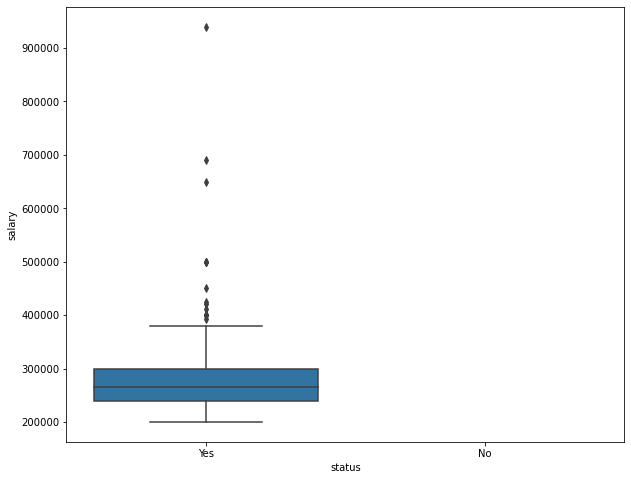

In [78]:
plt.figure(figsize=(10,8))

sns.boxplot(x='status', y='salary', data=dados)

Ou seja, a presença do valor de salário na base está atrelado à variável 'status', que indica se o candidato foi contratado ou não.

Para corrigir os NaN, será utilizado o valor 0 para o salário

In [79]:
dados.salary.fillna(0, inplace=True)

print(f'Valores nulos em "salary": {dados.salary.isna().sum()}')

Valores nulos em "salary": 0


# LabelEncoder

In [99]:
dados.head(10)

dados_encoded = dados.copy()

In [100]:
# Aplicação em colunas binárias
cols_string_binary = ['gender', 'ssc_b','hsc_b','workex','specialisation','status']

In [101]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [102]:
for col in cols_string_binary:
    dados_encoded[col] = label_encoder.fit_transform(dados_encoded[col])

In [103]:
dados_encoded

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,0,78.33,1,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,0,68.00,0,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,0,52.00,0,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,0.0
4,5,1,85.80,0,73.60,0,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,80.60,1,82.00,1,Commerce,77.60,Comm&Mgmt,0,91.0,0,74.49,1,400000.0
211,212,1,58.00,1,60.00,1,Science,72.00,Sci&Tech,0,74.0,0,53.62,1,275000.0
212,213,1,67.00,1,67.00,1,Commerce,73.00,Comm&Mgmt,1,59.0,0,69.72,1,295000.0
213,214,0,74.00,1,66.00,1,Commerce,58.00,Comm&Mgmt,0,70.0,1,60.23,1,204000.0


Automaticamente alterou colunas binárias para 1 e 0. 

Para variáveis com mais de uma categorias, será usado o OneHotEncoding

In [104]:
cols_string_multiple = ['hsc_s','degree_t']

In [105]:
for col in cols_string_multiple:
    dummy_df = pd.get_dummies(dados_encoded[col], prefix=col)

    dados_encoded = pd.concat([dados_encoded, dummy_df], axis=1)


In [106]:
dados_encoded.drop(columns=cols_string_multiple, inplace=True)
dados_encoded.drop(columns=['sl_no'], inplace=True)

dados_encoded

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,salary,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech
0,1,67.00,1,91.00,1,58.00,0,55.0,1,58.80,1,270000.0,0,1,0,0,0,1
1,1,79.33,0,78.33,1,77.48,1,86.5,0,66.28,1,200000.0,0,0,1,0,0,1
2,1,65.00,0,68.00,0,64.00,0,75.0,0,57.80,1,250000.0,1,0,0,1,0,0
3,1,56.00,0,52.00,0,52.00,0,66.0,1,59.43,0,0.0,0,0,1,0,0,1
4,1,85.80,0,73.60,0,73.30,0,96.8,0,55.50,1,425000.0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,77.60,0,91.0,0,74.49,1,400000.0,0,1,0,1,0,0
211,1,58.00,1,60.00,1,72.00,0,74.0,0,53.62,1,275000.0,0,0,1,0,0,1
212,1,67.00,1,67.00,1,73.00,1,59.0,0,69.72,1,295000.0,0,1,0,1,0,0
213,0,74.00,1,66.00,1,58.00,0,70.0,1,60.23,1,204000.0,0,1,0,1,0,0


# Exploração da base de dados

## hsc_p

Variável com distribuição aproximadamente normal

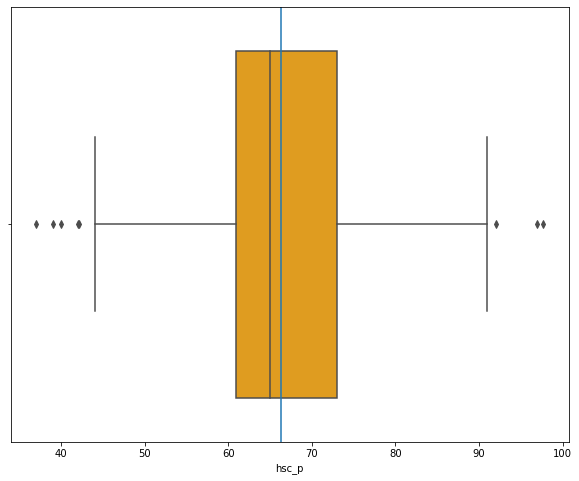

In [107]:
plt.figure(figsize=(10,8))

sns.boxplot(x='hsc_p', data=dados_encoded, color='orange')

plt.axvline(x=dados_encoded.hsc_p.mean())

plt.show()

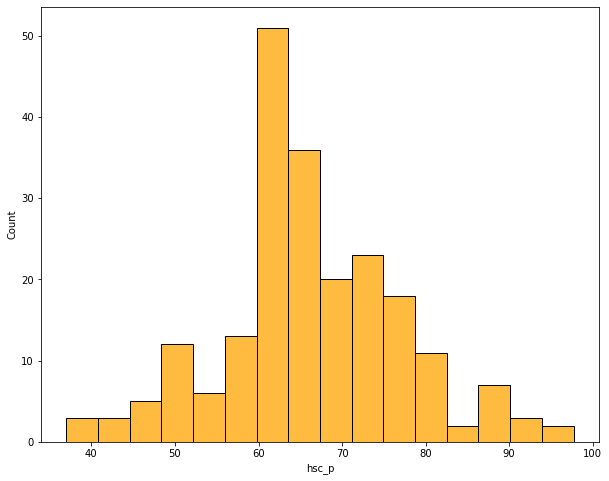

In [108]:
plt.figure(figsize=(10,8))

sns.histplot(x='hsc_p', data=dados_encoded, color='orange')

plt.show()

## degree_p

Também distribuição aproximadamente normal

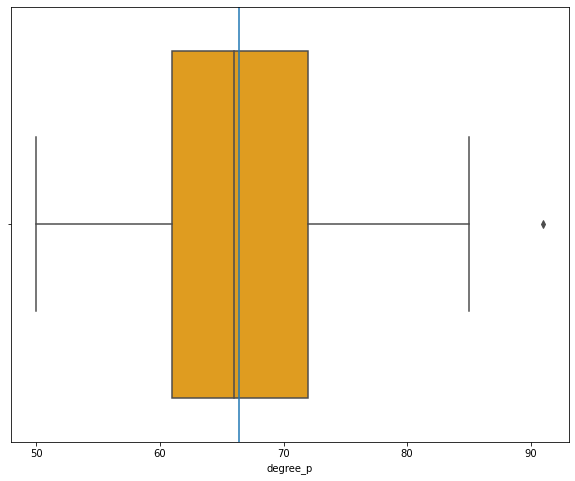

In [109]:
plt.figure(figsize=(10,8))

sns.boxplot(x='degree_p', data=dados_encoded, color='orange')

plt.axvline(x=dados_encoded.degree_p.mean())

plt.show()

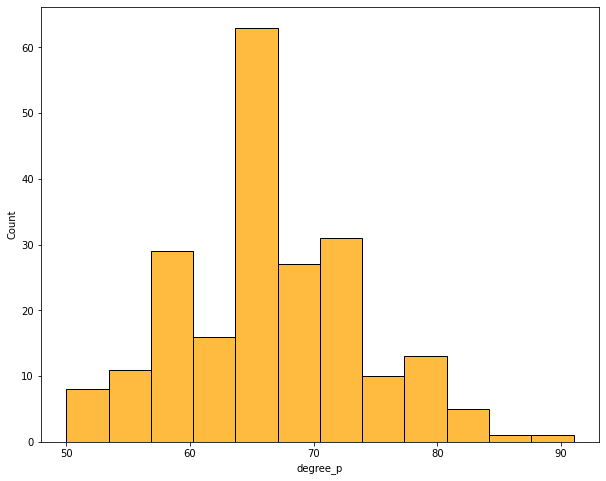

In [110]:
plt.figure(figsize=(10,8))

sns.histplot(x='degree_p', data=dados_encoded, color='orange')

plt.show()

## mba_p

Também distribuição aproximadamente normal

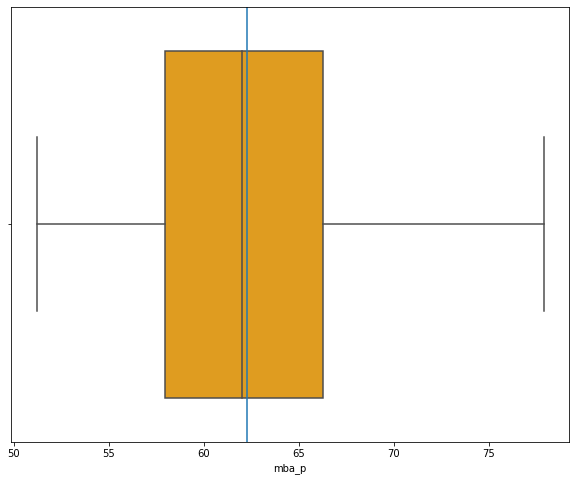

In [111]:
plt.figure(figsize=(10,8))

sns.boxplot(x='mba_p', data=dados_encoded, color='orange')

plt.axvline(x=dados_encoded.mba_p.mean())

plt.show()

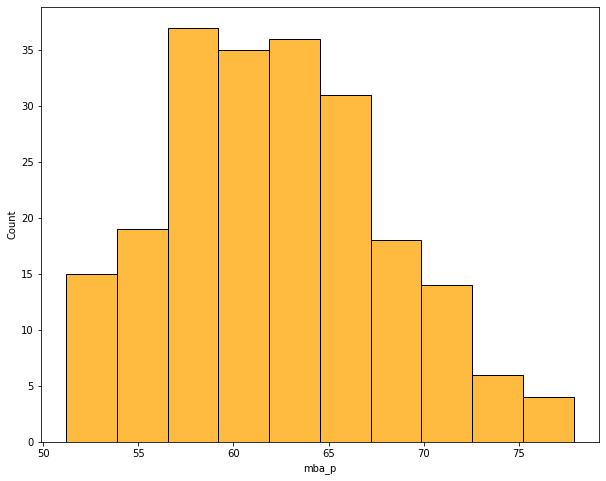

In [112]:
plt.figure(figsize=(10,8))

sns.histplot(x='mba_p', data=dados_encoded, color='orange')

plt.show()

## salary

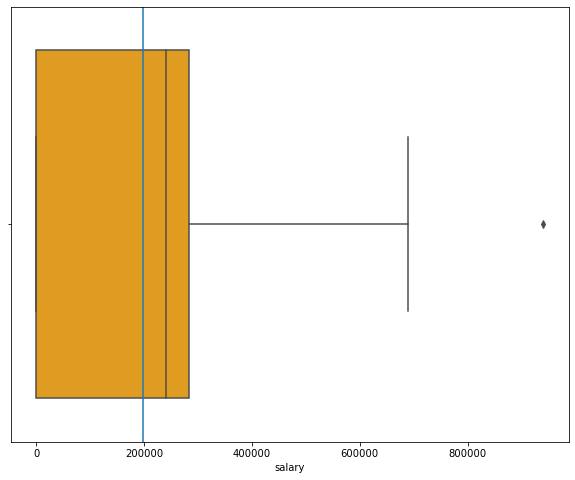

In [113]:
plt.figure(figsize=(10,8))

sns.boxplot(x='salary', data=dados_encoded, color='orange')

plt.axvline(x=dados_encoded.salary.mean())

plt.show()

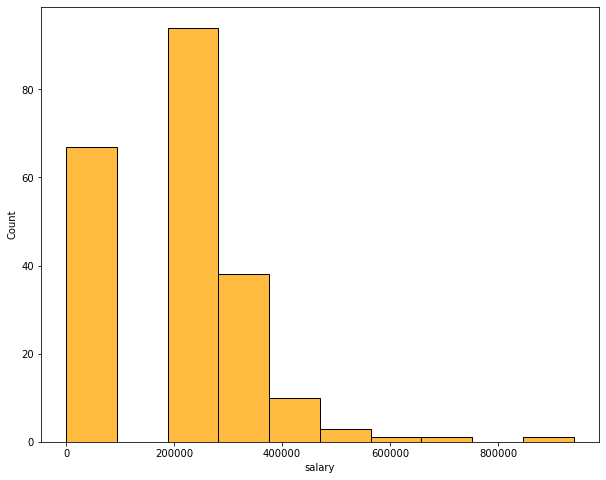

In [114]:
plt.figure(figsize=(10,8))

sns.histplot(x='salary', data=dados_encoded, color='orange')

plt.show()

Agora já vemos uma grande assimetria no gráfico, a maioria dos candidatos possuem salários mais baixos e poucos recebem salários muito altos

## Relação entre 'mba_p' e 'status'

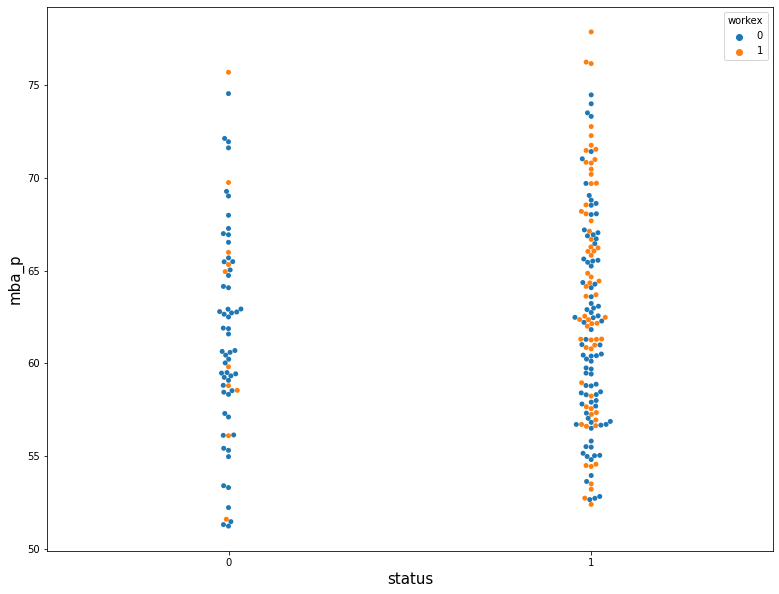

In [115]:
plt.figure(figsize=(13,10))

ax = sns.swarmplot(data=dados_encoded, x='status', y='mba_p', hue='workex')

ax.set_xlabel('status', fontsize=15)
ax.set_ylabel('mba_p', fontsize=15)

plt.show()

A princípio a variável mba_p não tem grande influência, mas a workex é bastante influente. Candidatos com experiência prévia possuem mais chances de serem contratados.

## Violinplot

In [116]:
import plotly.express as px

In [117]:
px.violin(dados_encoded, y='salary', x='specialisation', color='gender', box=True)

## Correlação

In [118]:
dados_encoded.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,salary,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech
0,1,67.00,1,91.00,1,58.00,0,55.0,1,58.80,1,270000.0,0,1,0,0,0,1
1,1,79.33,0,78.33,1,77.48,1,86.5,0,66.28,1,200000.0,0,0,1,0,0,1
2,1,65.00,0,68.00,0,64.00,0,75.0,0,57.80,1,250000.0,1,0,0,1,0,0
3,1,56.00,0,52.00,0,52.00,0,66.0,1,59.43,0,0.0,0,0,1,0,0,1
4,1,85.80,0,73.60,0,73.30,0,96.8,0,55.50,1,425000.0,0,1,0,1,0,0


In [119]:
corr_matrix = dados_encoded.iloc[:,1:].corr().round(2)

In [120]:
corr_matrix

,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,salary,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech
ssc_p,1.00,0.12,0.51,0.07,0.54,0.18,0.26,-0.17,0.39,0.61,0.54,-0.20,-0.10,0.19,-0.18,-0.07,0.22
ssc_b,0.12,1.00,-0.14,0.61,0.04,-0.04,-0.02,-0.05,0.08,0.04,0.03,-0.00,-0.06,0.06,-0.09,-0.00,0.10
hsc_p,0.51,-0.14,1.00,-0.02,0.43,0.14,0.25,-0.24,0.35,0.49,0.45,-0.08,0.26,-0.23,0.11,-0.13,-0.05
hsc_b,0.07,0.61,-0.02,1.00,0.07,0.04,0.04,0.00,0.09,0.02,0.01,-0.12,-0.07,0.13,-0.03,-0.12,0.09
degree_p,0.54,0.04,0.43,0.07,1.00,0.12,0.22,-0.22,0.40,0.48,0.41,-0.15,-0.02,0.09,-0.03,-0.18,0.12
workex,0.18,-0.04,0.14,0.04,0.12,1.00,0.06,-0.19,0.17,0.28,0.30,0.05,-0.06,0.03,-0.10,0.01,0.10
etest_p,0.26,-0.02,0.25,0.04,0.22,0.06,1.00,-0.24,0.22,0.13,0.19,-0.07,-0.02,0.06,-0.01,0.01,0.01
specialisation,-0.17,-0.05,-0.24,0.00,-0.22,-0.19,-0.24,1.00,-0.11,-0.25,-0.28,-0.08,-0.13,0.17,-0.10,0.09,0.06
mba_p,0.39,0.08,0.35,0.09,0.40,0.17,0.22,-0.11,1.00,0.08,0.14,0.00,-0.05,0.05,-0.10,-0.04,0.13
status,0.61,0.04,0.49,0.02,0.48,0.28,0.13,-0.25,0.08,1.00,0.87,-0.07,0.02,0.01,0.05,-0.12,0.01


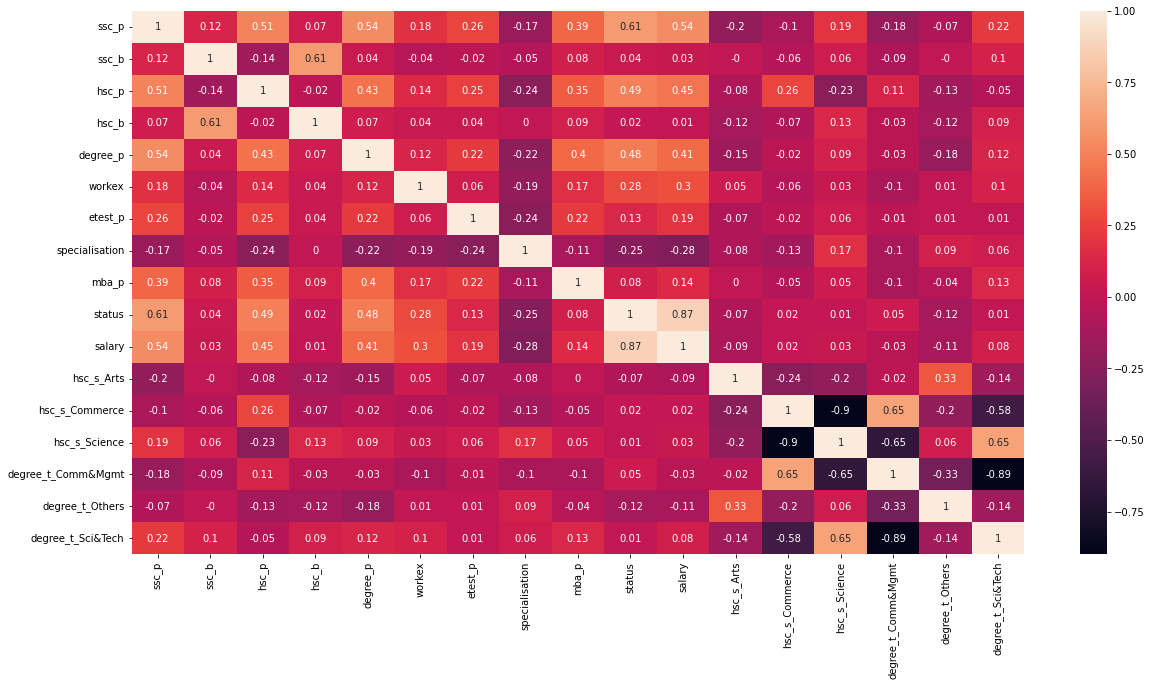

In [121]:
fig,ax = plt.subplots(figsize=(20, 10))

sns.heatmap(data=corr_matrix, annot=True, ax=ax)

plt.show()